# Bar Chart Race in Python with Matplotlib

From this article:
https://towardsdatascience.com/bar-chart-race-in-python-with-matplotlib-8e687a5c8a41

### import the dependent libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

### Data

In [2]:
df = pd.read_csv('wiadatacert.csv')

In [3]:
df.head()

,Year,Pilots,Certificate,Range
0,2009,8450,Student,Student
1,2009,13,Recreational,Recreational
2,2009,98,Sport,Sport
3,2009,14322,Private,Private
4,2009,8289,Commercial,Commercial


### Color, Labels

We'll user `colors` and `group_lk` to add color to the bars.

Group the states by region.

In [4]:
colors = dict(zip(
    ["Recreational", "Student", "Sport", "Commercial", "ATP", "Private"],
    ["#E6E6FA", "#87CEEB", "#D8BFD8", "#F08080", "#F0E68C", "#7FFFD4"]
))
group_lk = df.set_index('Certificate')['Range'].to_dict()

In [5]:
current_year = 2018
dff = df[df['Year'].eq(current_year)].sort_values(by='Pilots', ascending=False).head(10)
dff

,Year,Pilots,Certificate,Range
54,2018,22266,Student,Student
57,2018,10255,Private,Private
59,2018,7136,ATP,ATP
58,2018,6556,Commercial,Commercial
56,2018,240,Sport,Sport
55,2018,10,Recreational,Recreational


### Basic chart

Now, let's plot a basic bar chart. We start by creating a figure and an axes.
Then, we use `ax.barh(x, y)` to draw horizontal barchart.


<BarContainer object of 6 artists>

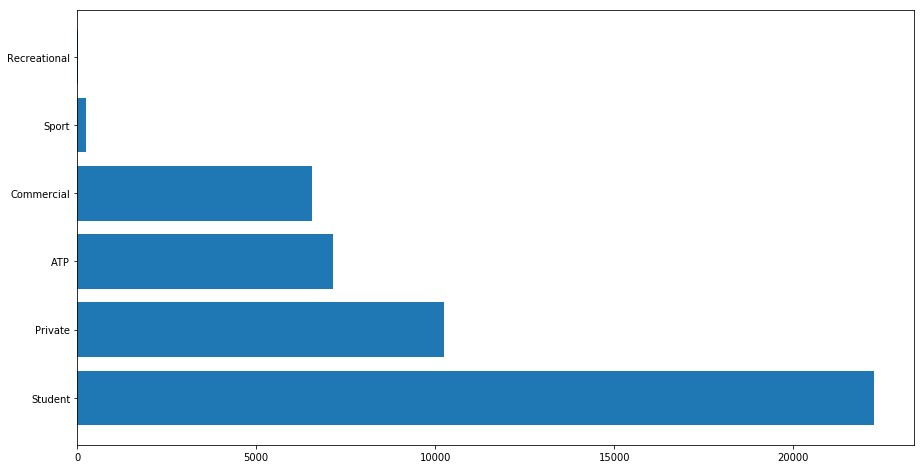

In [6]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['Certificate'], dff['Pilots'])

Text(1, 0.4, '2018')

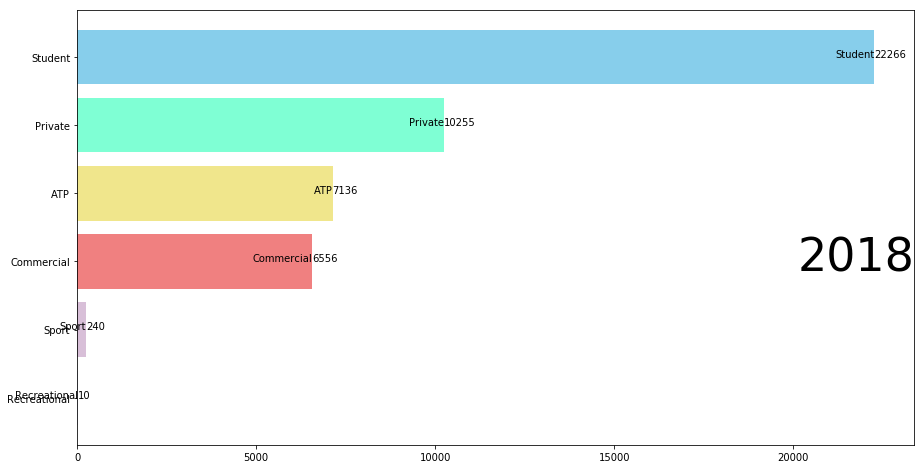

In [7]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]
ax.barh(dff['Certificate'], dff['Pilots'], color=[colors[group_lk[x]] for x in dff['Certificate']])
for i, (Pilots, Certificate) in enumerate(zip(dff['Pilots'], dff['Certificate'])):
    ax.text(Pilots, i,     Certificate,            ha='right')
    ax.text(Pilots, i,     Pilots, ha='left')
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

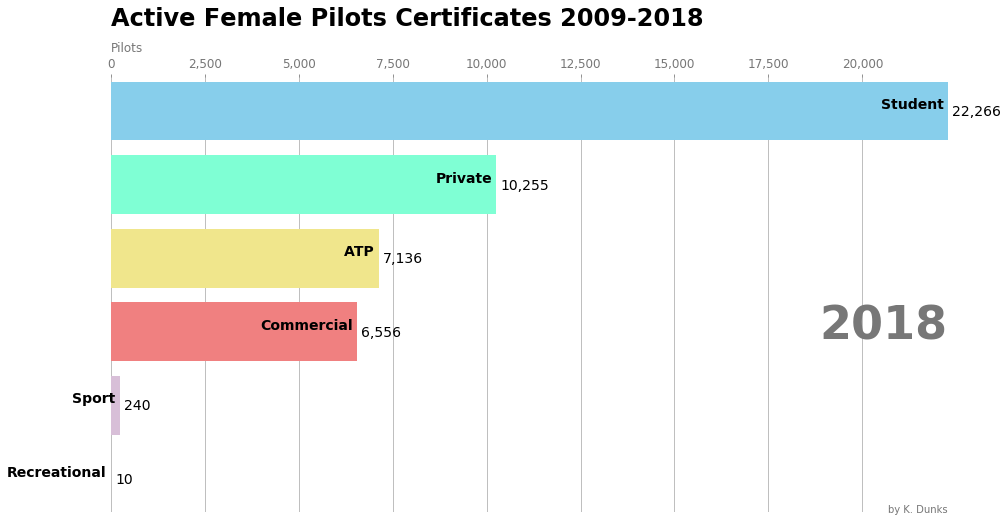

In [8]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(Year):
    dff = df[df['Year'].eq(Year)].sort_values(by='Pilots', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Certificate'], dff['Pilots'], color=[colors[group_lk[x]] for x in dff['Certificate']])
    dx = dff['Pilots'].max() / 200
    for i, (Pilots, Certificate) in enumerate(zip(dff['Pilots'], dff['Certificate'])):
        ax.text(Pilots-dx, i,     Certificate,           size=14, weight=600, ha='right', va='bottom')
        ax.text(Pilots+dx, i,     f'{Pilots:,.0f}',  size=14, ha='left',  va='center')
        
    # ... polished styles
    ax.text(1, 0.4, Year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Pilots', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Active Female Pilots Certificates 2009-2018',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by K. Dunks', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2018)

Matplotlib is a massive library, being able to adjust every aspect of a plot is powerful
but it can be complex / time-consuming for highly customized charts.
Atleast, for these bar chart races, it was fairly quick!

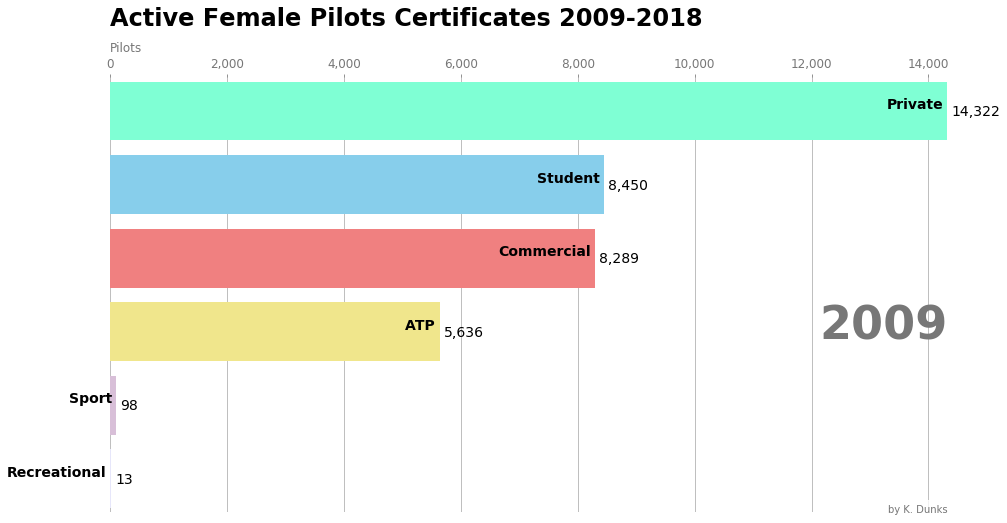

In [11]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(2009, 2019))
HTML(animator.to_jshtml())
## or use animator.to_html5_video() or animator.save()

In [61]:
from PIL import Image, ImageDraw

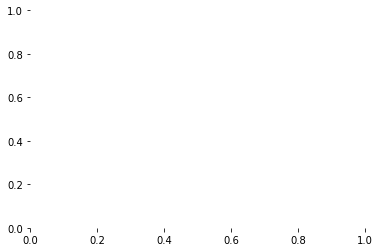

In [12]:
animator.save('animation.gif', writer='imagemagick', fps=60)